# imports

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from basin_volume import *

In [5]:
import os
import pickle

In [4]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results")

In [17]:
# ls results_dir chronologically
sorted(os.listdir(results_dir))


['31m_checkpoint_scan.pkl',
 '31m_cutoff_scan.pkl',
 'convnext_epsilons_1024_10.pkl',
 'convnext_epsilons_early_1024_10.pkl',
 'convnext_kl_basins.pkl',
 'convnext_timing_1024_100.pkl',
 'pythia_31m_chkpts_10_10.pkl',
 'pythia_31m_chkpts_20_100.pkl',
 'pythia_31m_chkpts_30_1.pkl',
 'pythia_31m_chkpts_32_1.pkl',
 'pythia_31m_chkpts_overnight_10_500.pkl',
 'pythia_31m_chkpts_test.pkl',
 'pythia_31m_final_test.pkl',
 'pythia_exponents_20_100.pkl',
 'pythia_high_cutoff_adam_20_10.pkl',
 'pythia_histo_False.pkl',
 'pythia_histo_True.pkl',
 'pythia_low_cutoff_adam_20_10.pkl',
 'pythia_normal_cutoff_adam_20_10.pkl',
 'pythia_overnight_adam_10_500.pkl',
 'pythia_overnight_cutoff_20_100.pkl',
 'pythia_overnight_cutoff_32_100.pkl',
 'pythia_overnight_cutoff_adam_20_100.pkl',
 'pythia_overnight_cutoff_adam_20_100_True.pkl',
 'pythia_timing_20_100.pkl',
 'pythia_very_high_cutoff_adam_20_10.pkl']

In [5]:
import pickle

# cutoff scans

In [6]:
with open(os.path.join(results_dir, "pythia_overnight_cutoff_adam_20_100.pkl"), "rb") as f:
    results_adam, cfg = pickle.load(f)


with open(os.path.join(results_dir, "pythia_overnight_cutoff_20_100.pkl"), "rb") as f:
    results_no_adam, cfg = pickle.load(f)



In [20]:
pythia_31m_model = load_pythia_checkpoint("143000", "31m")
model_dim = torch.nn.utils.parameters_to_vector(pythia_31m_model.parameters()).shape[0]
print(model_dim)

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


30494720


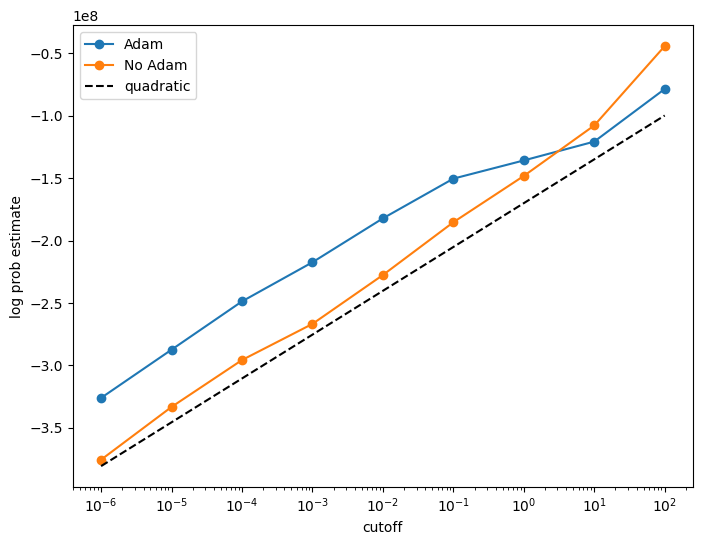

In [12]:
plt.figure(figsize=(8, 6))
maxes_adam = [result.estimates.max() for result in results_adam.values()]
plt.plot(list(results_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_no_adam = [result.estimates.max() for result in results_no_adam.values()]
plt.plot(list(results_no_adam.keys()), maxes_no_adam, 'o-', label="No Adam")

plt.xlabel("cutoff")
plt.ylabel("log prob estimate")
plt.xscale("log")
# line with slope model_dim/2
plt.plot(list(results_adam.keys()), 
         [model_dim/2 * np.log(cutoff) - 1.7e8 for cutoff in results_adam.keys()], 
         '--', color="black", 
         label="quadratic")
plt.legend()
plt.show()

# epsilon scans

In [8]:
with open(os.path.join(results_dir, "pythia_high_cutoff_adam_20_10.pkl"), "rb") as f:
    results_high_cutoff_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_low_cutoff_adam_20_10.pkl"), "rb") as f:
    results_low_cutoff_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_very_high_cutoff_adam_20_10.pkl"), "rb") as f:
    results_very_high_cutoff_adam, cfg = pickle.load(f)

In [22]:
results_high_cutoff_adam.keys()

dict_keys([np.float32(1e-09), np.float32(1e-08), np.float32(1e-07), np.float32(1e-06), np.float32(1e-05), np.float32(0.000100000005), np.float32(0.001), np.float32(0.01), np.float32(0.10000002)])

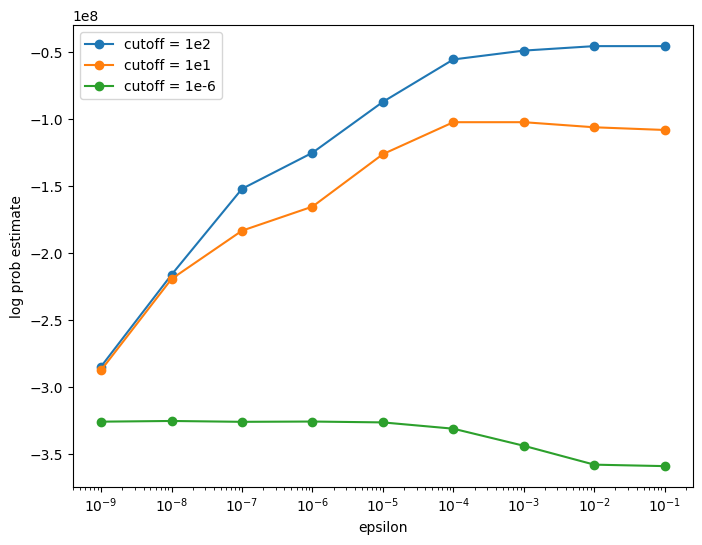

In [10]:

plt.figure(figsize=(8, 6))

maxes_very_high_cutoff_adam = [result.estimates.max() for result in results_very_high_cutoff_adam.values()]
plt.plot(list(results_very_high_cutoff_adam.keys()), maxes_very_high_cutoff_adam, 'o-', label="cutoff = 1e2")

maxes_high_cutoff_adam = [result.estimates.max() for result in results_high_cutoff_adam.values()]
plt.plot(list(results_high_cutoff_adam.keys()), maxes_high_cutoff_adam, 'o-', label="cutoff = 1e1")

maxes_low_cutoff_adam = [result.estimates.max() for result in results_low_cutoff_adam.values()]
plt.plot(list(results_low_cutoff_adam.keys()), maxes_low_cutoff_adam, 'o-', label="cutoff = 1e-6")

plt.xlabel("epsilon")
plt.ylabel("log prob estimate")
plt.xscale("log")
plt.legend()
plt.show()

# convnext

## epsilon scans

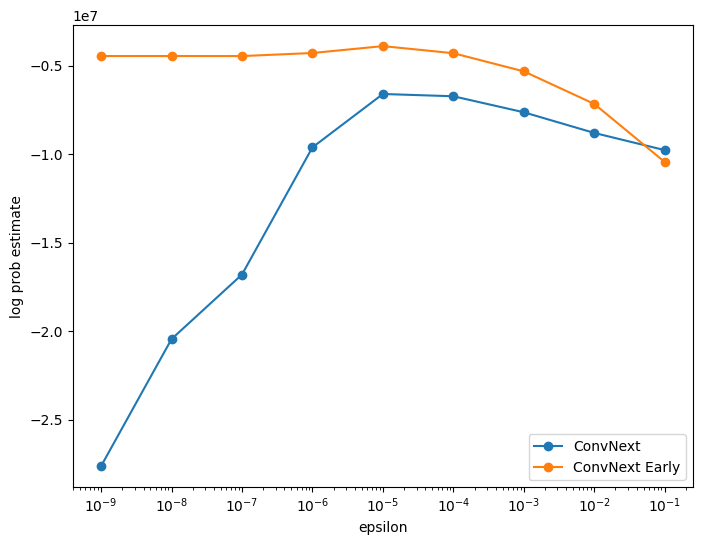

In [8]:
with open(os.path.join(results_dir, "convnext_epsilons_1024_10.pkl"), "rb") as f:
    results, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_epsilons_early_1024_10.pkl"), "rb") as f:
    results_early, cfg = pickle.load(f)

plt.figure(figsize=(8, 6))
maxes = [result.estimates.max() for result in results.values()]
plt.plot(list(results.keys()), maxes, 'o-', label="ConvNext")

maxes_early = [result.estimates.max() for result in results_early.values()]
plt.plot(list(results_early.keys()), maxes_early, 'o-', label="ConvNext Early")

plt.xlabel("epsilon")
plt.ylabel("log prob estimate")
plt.xscale("log")
plt.legend()
plt.show()

# Final experiments

In [48]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results_tuesday")
sorted(os.listdir(results_dir))

['convnext_chkpts.pkl',
 'convnext_chkpts_True.pkl',
 'convnext_chkpts_True_True.pkl',
 'convnext_cutoff_1e-05.pkl',
 'convnext_cutoff_1e-05_True.pkl',
 'convnext_cutoff_True_1e-05.pkl',
 'convnext_cutoff_True_1e-05_True.pkl',
 'convnext_exponent_1e-05.pkl',
 'convnext_exponent_1e-05_True.pkl',
 'convnext_exponent_True_1e-05.pkl',
 'convnext_exponent_True_1e-05_True.pkl',
 'convnext_histo.pkl',
 'convnext_histo_True.pkl',
 'convnext_histo_True_True.pkl',
 'convnext_histo_adam.pkl',
 'pythia_chkpts.pkl',
 'pythia_chkpts_True.pkl',
 'pythia_cutoff_1e-05.pkl',
 'pythia_cutoff_True_1e-02.pkl',
 'pythia_cutoff_True_1e-05.pkl',
 'pythia_exponent_1e-05.pkl',
 'pythia_exponent_True_1e-05.pkl',
 'pythia_histo.pkl',
 'pythia_histo_True.pkl']

In [28]:
with open(os.path.join(results_dir, "convnext_chkpts_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)

with open(os.path.join(results_dir, "convnext_histo_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)


None b16pai_p4
None b16pai_p4


## histo

None
adam


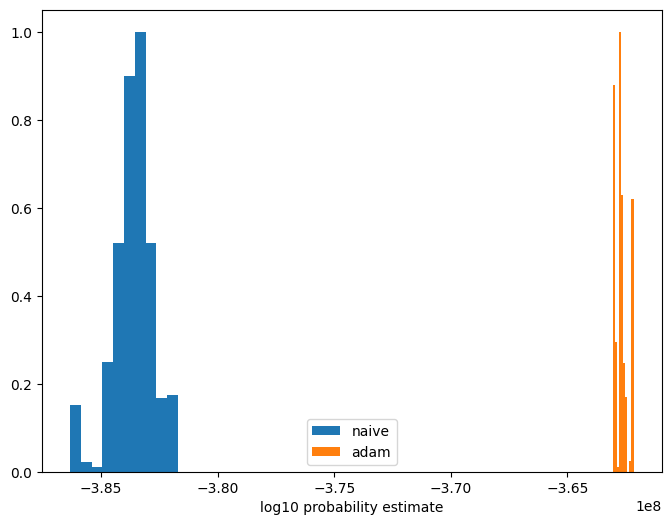

In [15]:
with open(os.path.join(results_dir, "pythia_histo.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "pythia_histo_True.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)
    
RESULTS = {'naive': result_naive, 'adam': result_adam}

plt.figure(figsize=(8, 6))

settings = {'alpha': 1, 'fill': True}

for label, results in RESULTS.items():
    these_settings = dict(settings, label=label)
    scaled_histogram(results.estimates / np.log(10), label, these_settings, nbins=10)
plt.xlabel("log10 probability estimate")
plt.legend()
#plt.title("KL divergence")

plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_histo.png"))

plt.show()

None
adam
None
adam


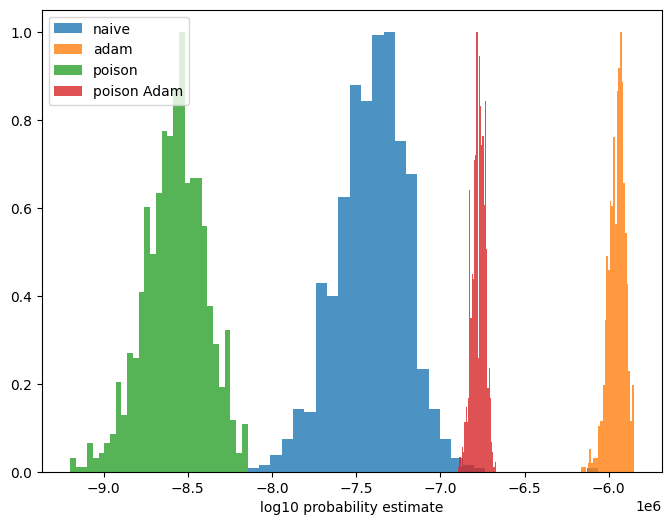

In [53]:
# 'convnext_histo.pkl',
# 'convnext_histo_adam.pkl', adam
#  'convnext_histo_True.pkl', poison
#  'convnext_histo_True_True.pkl', poison adam

with open(os.path.join(results_dir, "convnext_histo.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_adam.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_True.pkl"), "rb") as f:
    result_poison, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_True_True.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

RESULTS = {'naive': result_naive, 'adam': result_adam, 'poison': result_poison, 'poison Adam': result_poison_adam}

plt.figure(figsize=(8, 6))

settings = {'alpha': .8, 'fill': True}

for label, results in RESULTS.items():
    these_settings = dict(settings, label=label)
    scaled_histogram(results.estimates / np.log(10), label, these_settings, nbins=None)
plt.xlabel("log10 probability estimate")
plt.legend()
plt.show()


## chkpts

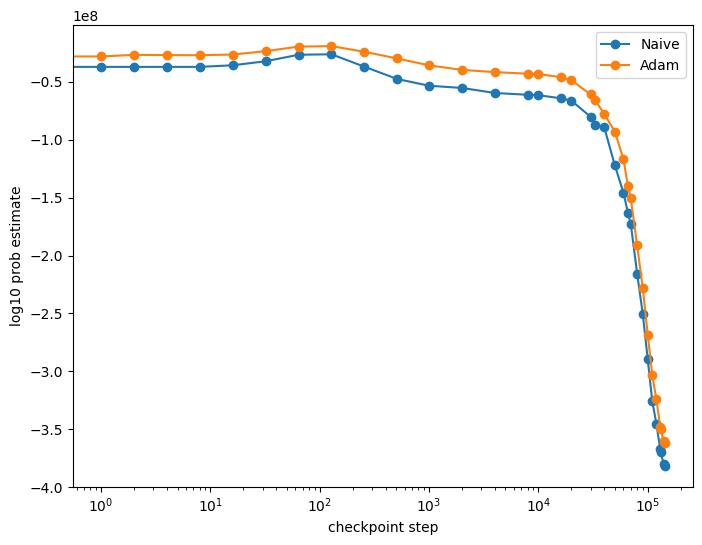

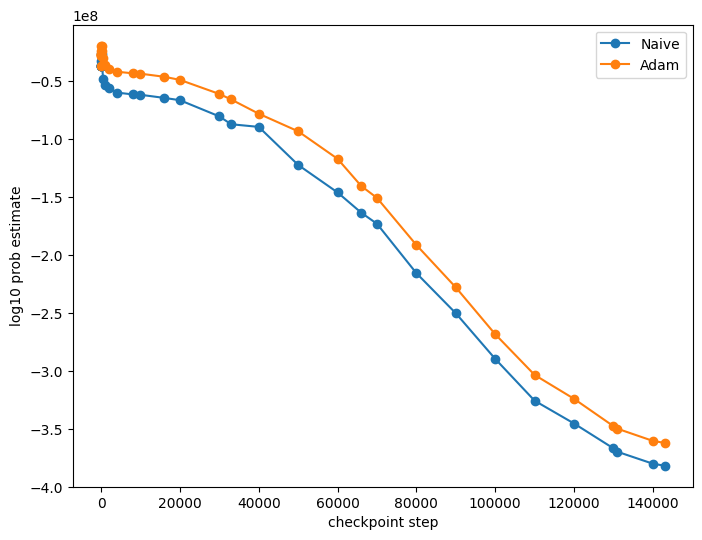

In [30]:
RESULTS = {}

with open(os.path.join(results_dir, "pythia_chkpts.pkl"), "rb") as f:
    RESULTS['naive'], cfg = pickle.load(f)
    
with open(os.path.join(results_dir, "pythia_chkpts_True.pkl"), "rb") as f:
    RESULTS['adam'], cfg = pickle.load(f)
    
# plot maxes against checkpoint steps
plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / np.log(10) for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

plt.xlabel("checkpoint step")
plt.ylabel("log10 prob estimate")
plt.xscale("log")
plt.legend()
plt.show()
# plot maxes against checkpoint steps
plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / np.log(10) for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

plt.xlabel("checkpoint step")
plt.ylabel("log10 prob estimate")

plt.legend()
plt.show()


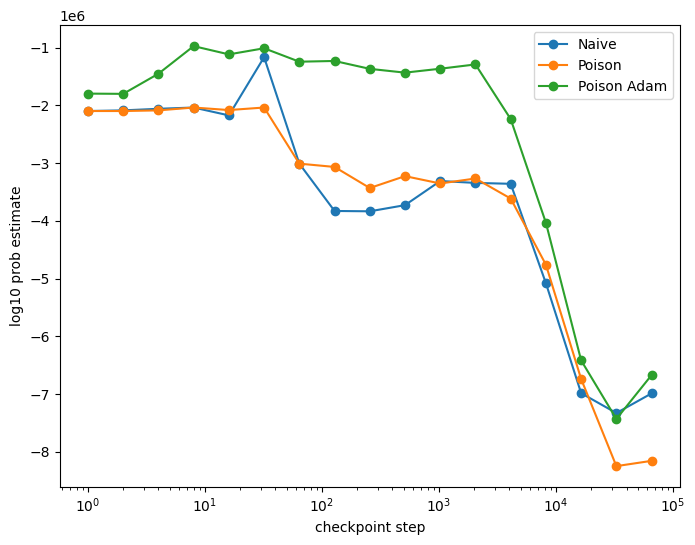

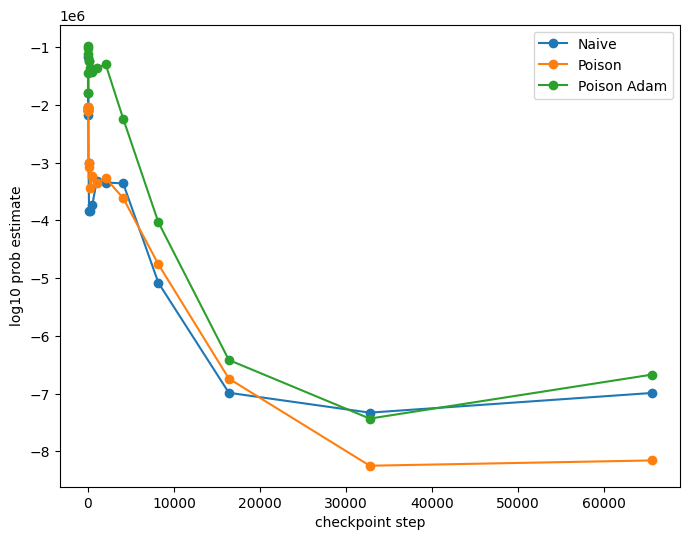

In [36]:
RESULTS = {}

with open(os.path.join(results_dir, "convnext_chkpts.pkl"), "rb") as f:
    RESULTS['naive'], cfg = pickle.load(f)
    
with open(os.path.join(results_dir, "convnext_chkpts_True.pkl"), "rb") as f:
    RESULTS['poison'], cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_chkpts_True_True.pkl"), "rb") as f:
    RESULTS['poison_adam'], cfg = pickle.load(f)
    
# plot maxes against checkpoint steps
plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_poison = [result.estimates.max() / np.log(10) for result in RESULTS['poison'].values()]
plt.plot(list(RESULTS['poison'].keys()), maxes_poison, 'o-', label="Poison")

maxes_poison_adam = [result.estimates.max() / np.log(10) for result in RESULTS['poison_adam'].values()]
plt.plot(list(RESULTS['poison_adam'].keys()), maxes_poison_adam, 'o-', label="Poison Adam")

plt.xlabel("checkpoint step")
plt.ylabel("log10 prob estimate")
plt.xscale("log")
plt.legend()
plt.show()
# plot maxes against checkpoint steps
plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_poison = [result.estimates.max() / np.log(10) for result in RESULTS['poison'].values()]
plt.plot(list(RESULTS['poison'].keys()), maxes_poison, 'o-', label="Poison")

maxes_poison_adam = [result.estimates.max() / np.log(10) for result in RESULTS['poison_adam'].values()]
plt.plot(list(RESULTS['poison_adam'].keys()), maxes_poison_adam, 'o-', label="Poison Adam")

plt.xlabel("checkpoint step")
plt.ylabel("log10 prob estimate")

plt.legend()
plt.show()

## cutoff

In [21]:
model_dim = 30494720

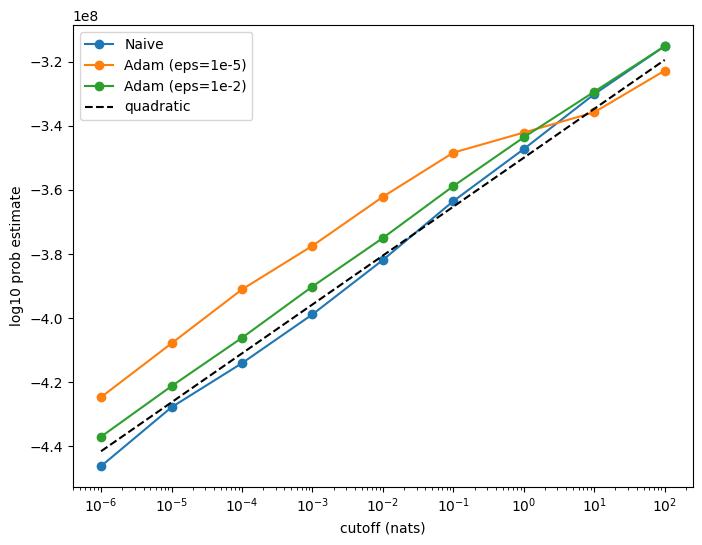

In [26]:
with open(os.path.join(results_dir, "pythia_cutoff_1e-05.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_cutoff_True_1e-05.pkl"), "rb") as f:
    result_adam_loweps, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_cutoff_True_1e-02.pkl"), "rb") as f:
    result_adam_higheps, cfg = pickle.load(f)

# plot maxes against cutoffs

plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in result_naive.values()]
plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam_loweps = [result.estimates.max() / np.log(10) for result in result_adam_loweps.values()]
plt.plot(list(result_adam_loweps.keys()), maxes_adam_loweps, 'o-', label="Adam (eps=1e-5)")

maxes_adam_higheps = [result.estimates.max() / np.log(10) for result in result_adam_higheps.values()]
plt.plot(list(result_adam_higheps.keys()), maxes_adam_higheps, 'o-', label="Adam (eps=1e-2)")

# line with slope model_dim/2
plt.plot(list(result_adam_higheps.keys()), 
         [model_dim/2 * np.log10(cutoff) - 3.5e8 for cutoff in result_adam_higheps.keys()], 
         '--', color="black", 
         label="quadratic")

plt.xlabel("cutoff (nats)")
plt.ylabel("log10 prob estimate")
plt.xscale("log")
plt.legend()
plt.show()

In [40]:
convnext_model = load_convnext_checkpoint(f"{BASIN_VOLUME_DIR}/runs/b16pai_p001/checkpoint-1")
convnext_model_dim = torch.nn.utils.parameters_to_vector(convnext_model.parameters()).shape[0]
print(convnext_model_dim)

3388810


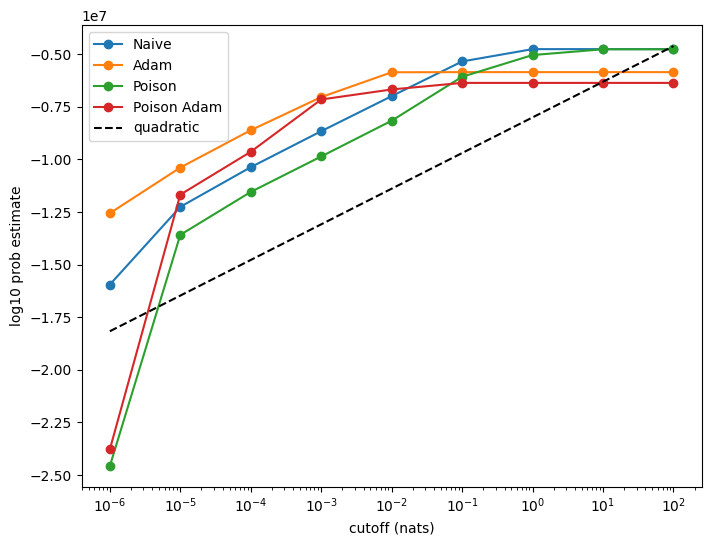

In [47]:
#  'convnext_cutoff_1e-05.pkl',
#  'convnext_cutoff_1e-05_True.pkl', poison
#  'convnext_cutoff_True_1e-05.pkl', adam
#  'convnext_cutoff_True_1e-05_True.pkl', poison adam

with open(os.path.join(results_dir, "convnext_cutoff_1e-05.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_1e-05_True.pkl"), "rb") as f:
    result_poison, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_True_1e-05.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_True_1e-05_True.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)


plt.figure(figsize=(8, 6))

maxes_naive = [result.estimates.max() / np.log(10) for result in result_naive.values()]
plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / np.log(10) for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_poison = [result.estimates.max() / np.log(10) for result in result_poison.values()]
plt.plot(list(result_poison.keys()), maxes_poison, 'o-', label="Poison")

maxes_poison_adam = [result.estimates.max() / np.log(10) for result in result_poison_adam.values()]
plt.plot(list(result_poison_adam.keys()), maxes_poison_adam, 'o-', label="Poison Adam")

# line with slope model_dim/2
plt.plot(list(result_poison_adam.keys()), 
         [convnext_model_dim/2 * np.log10(cutoff) - 8e6 for cutoff in result_poison_adam.keys()], 
         '--', color="black", 
         label="quadratic")

plt.xlabel("cutoff (nats)")
plt.ylabel("log10 prob estimate")
plt.xscale("log")
plt.legend()
plt.show()


## exponent


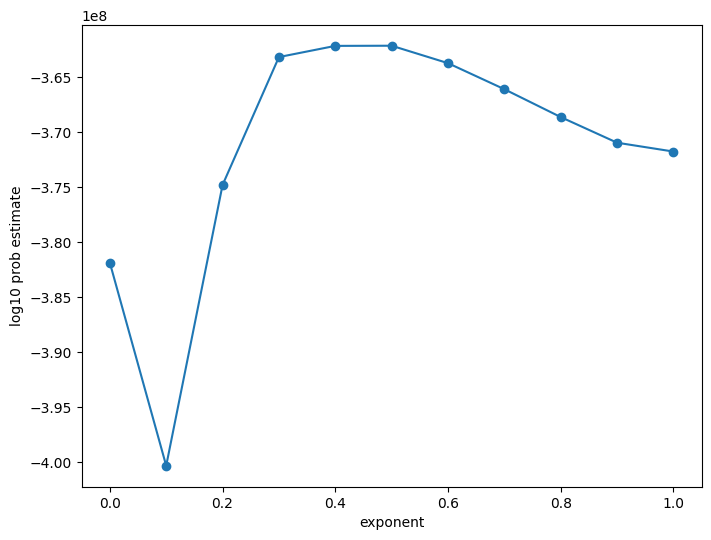

In [32]:

# with open(os.path.join(results_dir, "pythia_exponent_1e-05.pkl"), "rb") as f:
#     result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_exponent_True_1e-05.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

plt.figure(figsize=(8, 6))

# maxes_naive = [result.estimates.max() / np.log(10) for result in result_naive.values()]
# plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / np.log(10) for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")

plt.xlabel("exponent")
plt.ylabel("log10 prob estimate")
#plt.legend()
plt.show()
